<a href="https://colab.research.google.com/github/Nevary-Codes/Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from kaggle's dog breed identification competition.

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [ ]:
# Unzip the file
#!unzip "/content/drive/MyDrive/Dog Vision/Dog Breed Identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU", "available(YESSSSSSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version:  2.15.0
TF Hub version:  0.16.1
GPU not available :(


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we will be doing first, turning out images into Tensors (numerical representation).

Let's start by accessing our data and checking out the labels

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


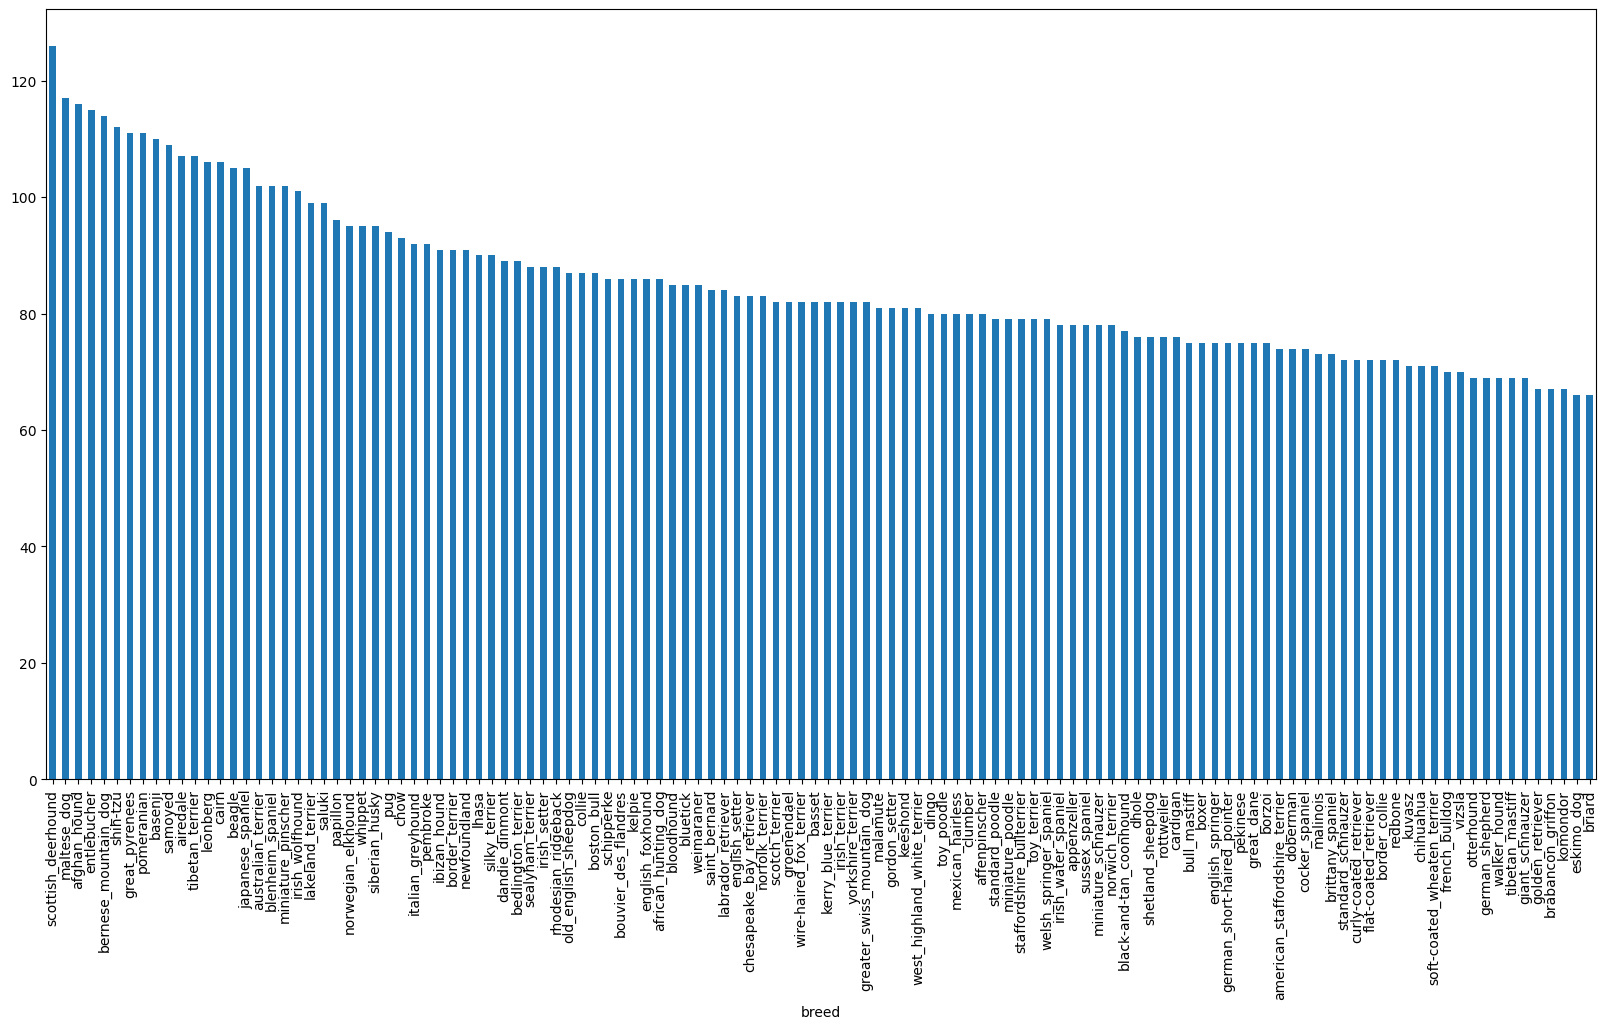

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
# Create pathnames from image ID's.
filenames = ["drive/MyDrive/Dog Vision/train/" + fname for fname in labels_csv["id"] + ".jpg"]

# Check the first 10
filenames[:10]

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Proceed")
else:
  print("Stop")


In [ ]:
# One more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

Since we've got our training model image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

In [ ]:
# See if number of labels matches the numbers of filenames
if len(labels) == len(filenames):
  print("Proceed")
else:
  print("Stop")

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

In [ ]:
len(boolean_labels)

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where sample label occurs

In [ ]:
boolean_labels[:2]

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set a number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

## Preprocessing Images (turning images into Tensors)

let's see what importing an image looks like

In [ ]:
# Convert an image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

In [ ]:
image.max(), image.min()

In [ ]:
image[:2]

In [ ]:
# Turn image into a Tensor
tf.constant(image)[:2]

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image file path as imput
2. Use TensorFlow to read the file and save it to a variable `image`
3. We want to turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channels values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively we need our data in the form of Tensor tuples which look like this:
`(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to make all of our data `(X and y)` into batches

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
# Check out the different attributes of our data batch
train_data.element_spec, val_data.element_spec

## Visualizing Data Batches

Our data is now in batches, however these can be a little hard to understand/comprehend, let's visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
      # Create subplots (5 rows, 5 columns)
      ax = plt.subplot(5, 5, i+1)
      # Display an image
      plt.imshow(images[i])
      # Add the image label as the title
      plt.title(unique_breeds[labels[i].argmax()])
      # Turn the grid lines off
      plt.axis("off")

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few thing we need to define
* The input shape (our images shape, in the form of tensors) to our model
* The outplut shape (image labels, in the form of tensors) of our model
* The URL of the model we want to use

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras  model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Build the model (tells the model the input shape it'll be getting).
* Returns the model

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  """
  Creates a model.
  """
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential(
      [
          hub.KerasLayer(model_url), # Layer 1 (input layer)
          tf.keras.layers.Dense(units=output_shape,
                                activation="softmax") # Layer 2 (output layer)
      ]
  )

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic funtion (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/Logs",
                        # make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available(YESSSSSSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Let's create a function which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorbaord`) will acess the logs directory we created earlier and visualize its contents.


In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/Logs

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Having the above functionality is great but we want to be able to do it at scale

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels

In [ ]:
# Turn prediction probabilities into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
# pred_label = get_pred_label(predictions[81])
# pred_label

Since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(batch):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels
  """
  images_ = []
  labels_ = []

  # Loop through unbatched data
  for image, label in batch.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  return images_, labels_

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

In [ ]:
get_pred_label(predictions[42]), get_pred_label(val_labels[42])

Now we've got ways to get:
* Prediction Labels
* Validation Labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visual

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilties to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot the image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth
  plt.title(f"{pred_label} {np.max(pred_prob)*100:2.0f}% {true_label}", color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our model's top 10 predictions

The function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, colouring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top10_index = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top10_prob = pred_prob[top10_index]

  # Find the top 10 prediction labels
  top10_pred_labels = unique_breeds[top10_index]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top10_pred_labels)),
                     top10_prob,
                     color="grey")
  plt.xticks(np.arange(len(top10_pred_labels)),
             labels=top10_pred_labels,
             rotation="vertical")

  # Change the color of true label
  if np.isin(true_label, top10_pred_labels):
    top_plot[np.argmax(top10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=42)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model



In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a model directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/Models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv3-Adam")

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("drive/MyDrive/Dog Vision/Models/20240722-03261721618761-1000-images-mobilenetv3-Adam.h5")

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

## Training a big dog model 🐶 (on the full data)

In [ ]:
len(X), len(y)

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

In [ ]:
full_data

In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

**Note:** Running the cell below will take a while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into the memory

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full-image")

In [ ]:
# Load the full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/Models/20240722-05201721625641-full-image.h5")

Loading saved model from: drive/MyDrive/Dog Vision/Models/20240722-05201721625641-full-image.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test data batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an ~1hr).

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

In [ ]:
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

## Preparing test dataset predictions for kaggle

Looking at the kaggle sample submission, we find that it wants our model's prediction probability outputs in a dataframe with an id column and a column for each different dog breed.

To get the data in this format, we'll:
* Create a pandas dataframe with an id column as well as a column for each dog breed
* Add data to the id column by extracting the test image id's from their file paths
* Add data (the prediction probabilities) to each of the dog breed columns
* Export the dataframe as a csv to submit it to kaggle

In [ ]:
# Create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image id's to predictions dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Save our predictions dataframe to csv for submission to kaggle
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_predictions_submission1_mobilnetv3.csv", index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batches()`. And since our photos won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's predict method
* Convert the prediction output probabilities to prediction labels
* Compare the predicted labels to the custom images

In [ ]:
# Get custom image filepaths
import os
custom_path = "drive/MyDrive/Dog Vision/Custom Images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/Dog Vision/Custom Images/141D82AD-5570-4F40-B368-ECDFD934FB7E.JPG',
 'drive/MyDrive/Dog Vision/Custom Images/1DF661DB-EE7E-4B0A-BB4D-7B9F42C1A2B2.JPG',
 'drive/MyDrive/Dog Vision/Custom Images/7D00AAAF-0F8D-40B1-9E5F-CBC9C81535D0.JPG',
 'drive/MyDrive/Dog Vision/Custom Images/95BB9821-CF9C-4B3A-9638-562B62F43392.JPG']

In [ ]:
# Turn custom images into data batches
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

1/1 [==============================] - 0s 379ms/step


array([[3.73160981e-11, 3.60064165e-13, 7.87090618e-12, 2.09571008e-13,
        9.70841348e-01, 7.04616148e-14, 7.20921150e-07, 8.79234949e-11,
        1.10076813e-12, 6.35155128e-09, 2.47723307e-07, 1.28234923e-15,
        2.24378377e-10, 4.52518136e-14, 6.76960971e-15, 2.43083873e-13,
        5.78908810e-10, 4.62358762e-10, 3.09896206e-12, 2.75407643e-07,
        4.36921832e-09, 6.11065786e-07, 1.22502442e-12, 4.91653918e-13,
        6.86875090e-13, 4.25148740e-13, 3.18577491e-11, 2.77135563e-12,
        3.57713387e-10, 4.28980883e-07, 7.05844671e-13, 1.78960828e-12,
        6.80790008e-11, 3.08928772e-13, 1.93343553e-11, 8.42514914e-13,
        2.11740885e-11, 1.78091014e-10, 9.71866546e-11, 2.94637836e-14,
        5.07686219e-11, 1.99598151e-11, 2.18322704e-11, 3.52898093e-12,
        4.86604707e-14, 2.28276986e-05, 9.15424312e-13, 3.26044936e-13,
        3.58972192e-11, 1.65297192e-12, 1.76062940e-13, 1.80706756e-08,
        4.27398048e-11, 1.35235547e-11, 1.12101846e-14, 8.809916

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['american_staffordshire_terrier',
 'saluki',
 'sealyham_terrier',
 'staffordshire_bullterrier']

In [ ]:
# Get custom images (our unbatchify function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

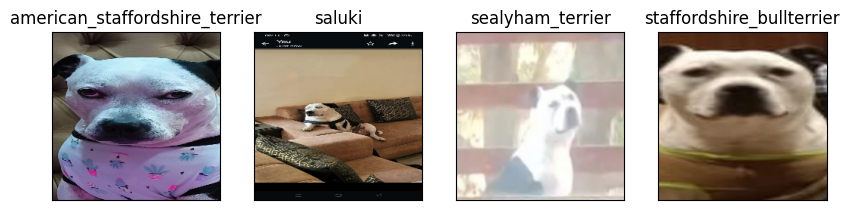

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)